In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

# Exercise 08:  Linear Regression

### The advertising data

To help you get started in these exercise, here's what we did with the advertising data.

What are the examples?

- Each example represents a product in a given market with a total of 200 in the dataset.

What are the features?

- **TV:** advertising dollars spent on TV ads 
- **radio:** advertising dollars spent on radio ads
- **newspaper:** advertising dollars spent on newspaper ads

All expenditures are in thousands of dollars.

What are the labels?

- **sales:** sales of a product in a given market (in thousands of widgets)

At this point we will focus on one of the features, TV advertising.

In [8]:
# read data into a pandas DataFrame
import pandas as pd
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', 
                   index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
len(data)

200

In [10]:
# create feature matrix and vector of labels
X = data[['TV']].values
y = data['sales'].values
X.shape, y.shape

((200, 1), (200,))


### Linear regression on the advertising data

Next, we will use scikit-learn to perform linear regression to predict sales:

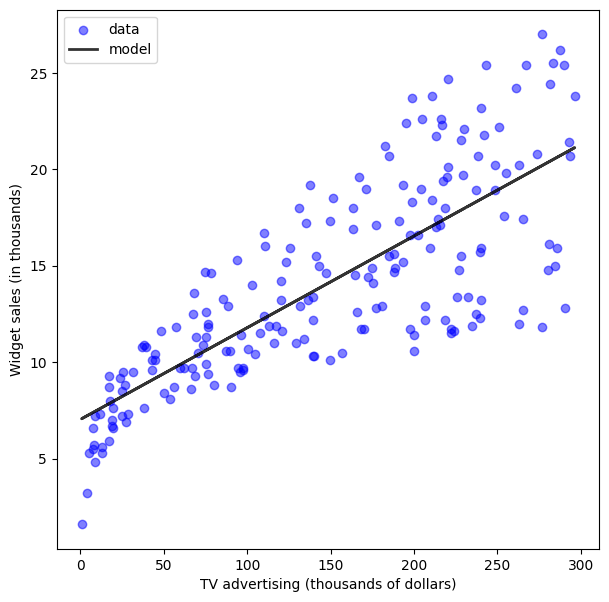

In [11]:
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# plot the reslts
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)

ax.scatter(X, y,  color='blue', alpha=0.5, label = 'data')
ax.plot(X, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
ax.set_xlabel('TV advertising (thousands of dollars)')
ax.set_ylabel('Widget sales (in thousands)')
ax.legend(loc="best");

### Exercise:  toy data

Create one-dimensional regression data using scikit-learn's [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression).  Use linear regression to create a model and plot the resulting fitted line.  Evaluate the quality of the model on a separate test set using the Root-Mean-Square Error (RMSE) which is the square root of the mean of the squared errors:

$$\mathrm{RMSE} = \sqrt{\frac 1N\sum_{i=1}^N(y_i-\hat{y}_i)^2}$$

Compare the RMSE on the training set with the RMSE on the test set.
In implementing the RMSE calculation, avoid using a for loop!

Note that `make_regression` has a `noise` parameter that controls the level of noise in the labels (it sets its standard deviation).  Choose an appropriate value so the data "looks noisy" when plotted.

(400, 1) (400,)


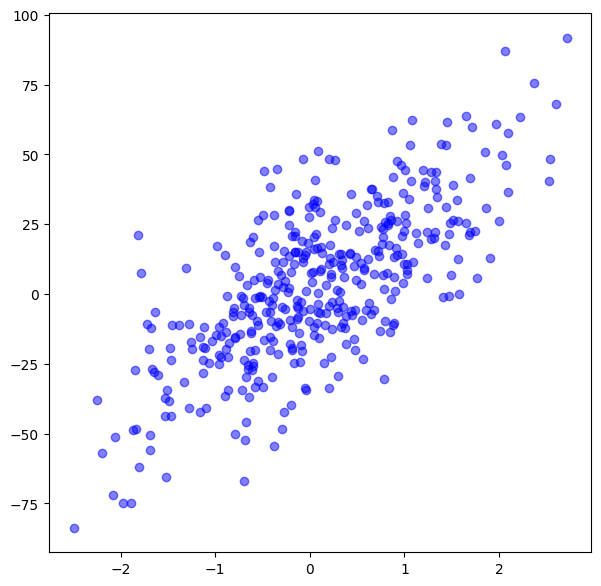

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# create data
noise_level = 19
X, y = make_regression(400, 1, noise=noise_level)

print(X.shape, y.shape)

# plot the data
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)

ax.scatter(X, y,  color='blue', alpha=0.5, label = 'data')

# split into train / test using sklearn.model_selection.train_test_split


# fit model

# compute RMSE on train / test sets

### Exercise:  Susceptibility to outliers

In the following toy problem, change the label of one of the data points to mimic a *data error* or other form of noise.  Describe the effect on the regression line.

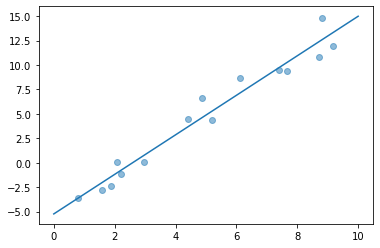

In [7]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(5)
x = 10 * rng.rand(15)
y = 2 * x - 5 + rng.randn(15)

model = LinearRegression()
model.fit(x[:, np.newaxis], y)

xs = np.linspace(0, 10, 1000)
ys = model.predict(xs[:, np.newaxis])

plt.scatter(x, y, alpha=0.5)
plt.plot(xs, ys);


In [8]:
# copy the above code cell and change one of the data 
# points to illustrate the effect of errors / outliers 
# on the resulting model